# Content

# Setting up the working directory

In [1]:
import os as os

In [2]:
os.chdir("C:\\Users\\kunal\\OneDrive\\Desktop\\Training 1\\Time series")

In [3]:
os.getcwd()

'C:\\Users\\kunal\\OneDrive\\Desktop\\Training 1\\Time series'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '.RData',
 '.Rhistory',
 'AirPassengers.csv',
 'ARIMA_Air_Passengers.R',
 'Assignment 2 DSp 15.R',
 'Avg_Monthly_Cycle_Hiring_Count.csv',
 'dailysales.csv',
 'Forecasting and Predicting the Furniture Sales of  .ipynb',
 'Gold price Data.csv',
 'Gold_Price_prediction.R',
 'Gold_Price_trend',
 'multiTimeline.csv',
 'Problem Statement.docx',
 'Super Store.csv',
 'Time series DC.ipynb',
 'Time Series Forecasting (1).pptx',
 'Time series on Cycle Ridership Data.ipynb',
 'Time series using ExL.ods',
 'Time_Series_Air_Passengers_dataset.ipynb',
 'Time_series_astsa_Birth.R',
 'Time_Series_Wikipedia.R',
 'TSA_Furniture_Sales-Copy1 april 2021.ipynb',
 'TSA_Furniture_Sales.ipynb',
 'TSA_Furniture_Sales_Self_FNotes.ipynb',
 'TSA_Furniture_Sales_Shared_April_22_2022.ipynb',
 'US_Birth.csv']

# Installing/Importing the packages to be used

In [5]:
import warnings
import itertools
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#rom matplotlib import pyplot



In [6]:
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Reading the Times series data

In [7]:
#read the datset 
furniture = pd.read_csv("Super Store.csv", encoding='cp1252')


furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [8]:

#Run the 1st 6 rows and all columns of the dataset
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [9]:
#Checking the simensionof the Time series data
furniture.shape

(2121, 21)

In [10]:
#Checking the str/character type variables

furniture.describe(include="all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,2121.000000,2121,2121,2121,2121,2121,2121,2121,2121,2121,...,2121.000000,2121,2121,2121,2121,2121,2121.000000,2121.000000,2121.000000,2121.000000
unique,NaN,1764,889,960,4,707,707,3,1,371,...,NaN,4,375,1,4,380,NaN,NaN,NaN,NaN
top,NaN,US-2015-129007,9/5/2016,12/6/2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,NaN,West,FUR-FU-10004270,Furniture,Furnishings,KI Adjustable-Height Table,NaN,NaN,NaN,NaN
freq,NaN,4,10,10,1248,15,15,1113,2121,192,...,NaN,707,16,2121,957,18,NaN,NaN,NaN,NaN
mean,5041.643564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55726.556341,NaN,NaN,NaN,NaN,NaN,349.834887,3.785007,0.173923,8.699327
std,2885.740258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32261.888225,NaN,NaN,NaN,NaN,NaN,503.179145,2.251620,0.181547,136.049246
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22801.000000,NaN,NaN,NaN,NaN,NaN,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60505.000000,NaN,NaN,NaN,NaN,NaN,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90032.000000,NaN,NaN,NaN,NaN,NaN,435.168000,5.000000,0.300000,33.726600


In [11]:
#Info command to have a glance on the datatypes and the missing values 
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

# check the time stamp

In [12]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

In [13]:
furniture=furniture.loc[:,['Order Date','Sales']];furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  2121 non-null   object 
 1   Sales       2121 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.3+ KB


In [14]:
furniture.shape

(2121, 2)

In [15]:
furniture = furniture.sort_values('Order Date')
furniture.head(20)

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940
344,1/10/2015,1018.104
1465,1/10/2016,24.850
972,1/10/2016,79.920
150,1/11/2014,9.940
1814,1/11/2016,54.992


In [16]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index();furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  889 non-null    object 
 1   Sales       889 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.0+ KB


In [17]:
#using the pd.to_datetime we convert the order date format 

furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.set_index('Order Date', inplace=True)
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [18]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2017-01-01 to 2017-09-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [19]:
furniture = furniture['Sales'].resample('MS').mean();furniture.head(20)

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
Freq: MS, Name: Sales, dtype: float64

In [20]:
furniture=pd.DataFrame(furniture)

In [21]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-01 to 2017-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [22]:
furniture.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')

In [23]:
furniture['2013':]

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [24]:
min(furniture.index)

Timestamp('2014-01-01 00:00:00', freq='MS')

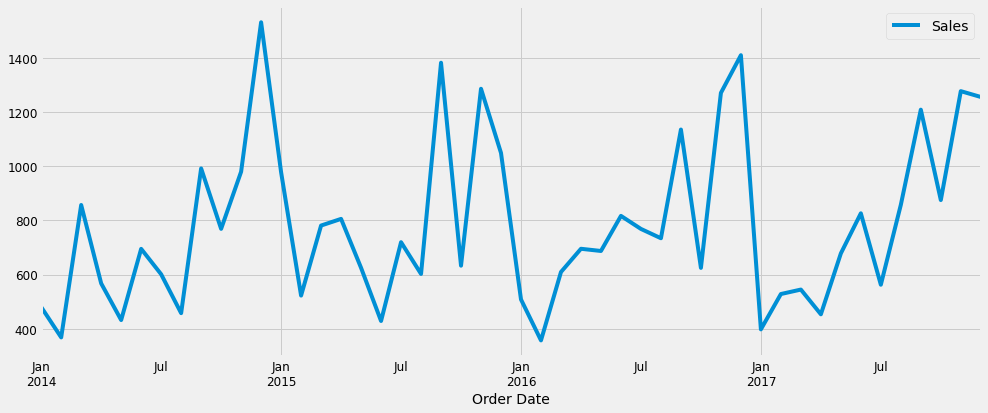

In [25]:
#visually checking the time series for trend and other componenets
furniture.plot(figsize=(15, 6))
plt.show()

In [26]:
#sns.lineplot(data=furniture)

The plot clearly indicates that the time series has seasonality pattern.The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year

# Checking Stationarity
Our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

In [27]:
#Performing the Dickey Fuller test


from pandas import Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(furniture)

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
       print(key, value)

ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
1% -3.6209175221605827
5% -2.9435394610388332
10% -2.6104002410518627


This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.

# Decomposing
Decomposing the time series into three distinct components: trend, seasonality, and noise.

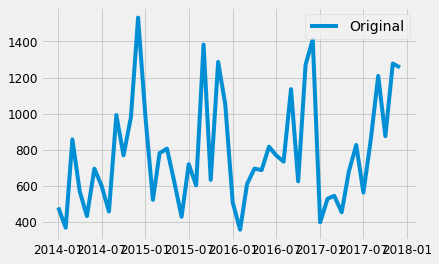

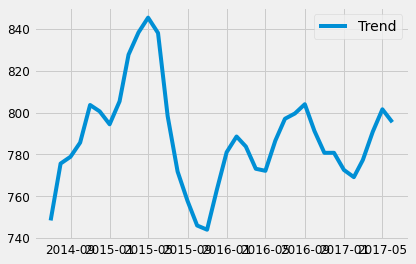

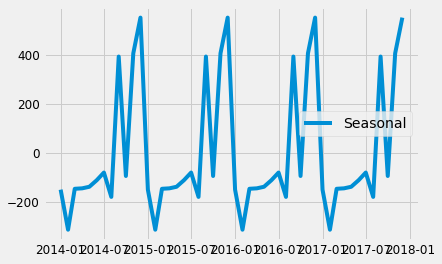

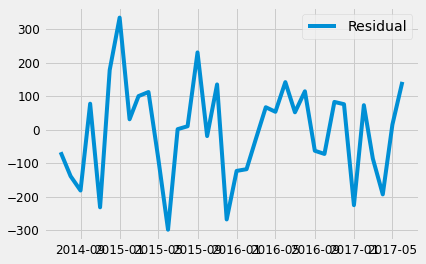

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(furniture)
plt.plot(furniture, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [29]:
#splitting the dataset into training and testing
furniture.shape

(48, 1)

In [30]:
train=furniture.iloc[:36];train.head(12)

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [31]:
train.tail(12)

,Sales
Order Date,
2016-01-01,508.182867
2016-02-01,356.868273
2016-03-01,609.575810
2016-04-01,695.373158
2016-05-01,687.265227
2016-06-01,816.910750
2016-07-01,768.736412
2016-08-01,734.307782
2016-09-01,1135.953371


In [32]:
test=furniture.iloc[36:];test.tail(12)

,Sales
Order Date,
2017-01-01,397.602133
2017-02-01,528.179800
2017-03-01,544.672240
2017-04-01,453.297905
2017-05-01,678.302328
2017-06-01,826.460291
2017-07-01,562.524857
2017-08-01,857.881889
2017-09-01,1209.508583


In [33]:
import numpy as np

In [34]:
#!pip install pmdarima

In [35]:
from pmdarima.arima import ARIMA

In [36]:
arimaModel=ARIMA((2,0,2),(1,0,0,12)).fit(train)

In [37]:
Forecast=pd.Series(arimaModel.predict(12)).rename('Forecast');Forecast

2017-01-01     654.057015
2017-02-01     476.493859
2017-03-01     701.390898
2017-04-01     722.708308
2017-05-01     730.446498
2017-06-01     820.095321
2017-07-01     772.909553
2017-08-01     770.703237
2017-09-01    1014.747626
2017-10-01     695.081834
2017-11-01    1109.215394
2017-12-01    1206.746306
Freq: MS, Name: Forecast, dtype: float64

In [38]:
Actual_Forecast_Df=pd.concat([furniture,Forecast],axis=1)

In [39]:
Actual_Forecast_Df[-12:]

,Sales,Forecast
2017-01-01,397.602133,654.057015
2017-02-01,528.179800,476.493859
2017-03-01,544.672240,701.390898
2017-04-01,453.297905,722.708308
2017-05-01,678.302328,730.446498
2017-06-01,826.460291,820.095321
2017-07-01,562.524857,772.909553
2017-08-01,857.881889,770.703237
2017-09-01,1209.508583,1014.747626
2017-10-01,875.362728,695.081834


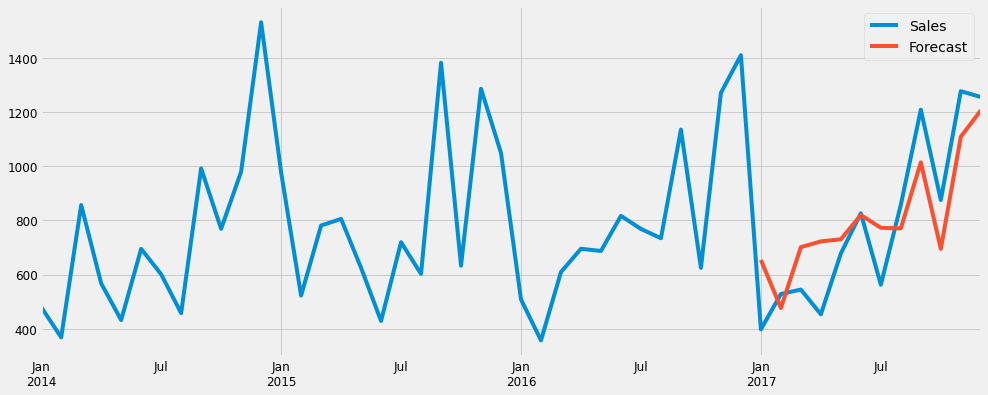

In [40]:
#plotting the actual versus forecasted

Actual_Forecast_Df.plot(figsize=(15, 6));plt.show()

In [74]:
#checking the error

Validation_Df=Actual_Forecast_Df[-12:].copy()
#MAPE
np.mean(abs(Validation_Df['Sales']-Validation_Df['Forecast'])/Validation_Df['Sales'])*100 

28.801130080179938

In [42]:
np.sqrt(np.mean((Validation_Df['Sales']-Validation_Df['Forecast'])**2))

163.6866509862295

In [43]:
from pmdarima import auto_arima
arimaModel_auto=auto_arima(train,m=12)

In [44]:
arimaModel_auto.get_params()['order'] #AR(p) d  MA(q)

(0, 0, 0)

In [45]:
arimaModel_auto.get_params()['seasonal_order'] #Seasonalti AR(P) D MA(Q)

(1, 1, 0, 12)

In [75]:
arimaModel2=ARIMA((0,0,0),(1,1,0,12)).fit(train)

In [76]:
Forecast_Auto=pd.Series(arimaModel2.predict(12)).rename('Forecast_Auto');Forecast_Auto

2017-01-01     952.239137
2017-02-01     561.183742
2017-03-01     818.718260
2017-04-01     856.341429
2017-05-01     712.300615
2017-06-01     585.317041
2017-07-01     804.190717
2017-08-01     704.545096
2017-09-01    1404.261421
2017-10-01     705.295410
2017-11-01    1357.472800
2017-12-01    1200.360592
Freq: MS, Name: Forecast_Auto, dtype: float64

In [77]:
Actual_Forecast_Df=pd.concat([furniture,Forecast_Auto],axis=1)

In [78]:
Actual_Forecast_Df

,Sales,Forecast_Auto
2014-01-01,480.194231,NaN
2014-02-01,367.931600,NaN
2014-03-01,857.291529,NaN
2014-04-01,567.488357,NaN
2014-05-01,432.049188,NaN
2014-06-01,695.059242,NaN
2014-07-01,601.169500,NaN
2014-08-01,457.521656,NaN
2014-09-01,992.353367,NaN
2014-10-01,769.015437,NaN


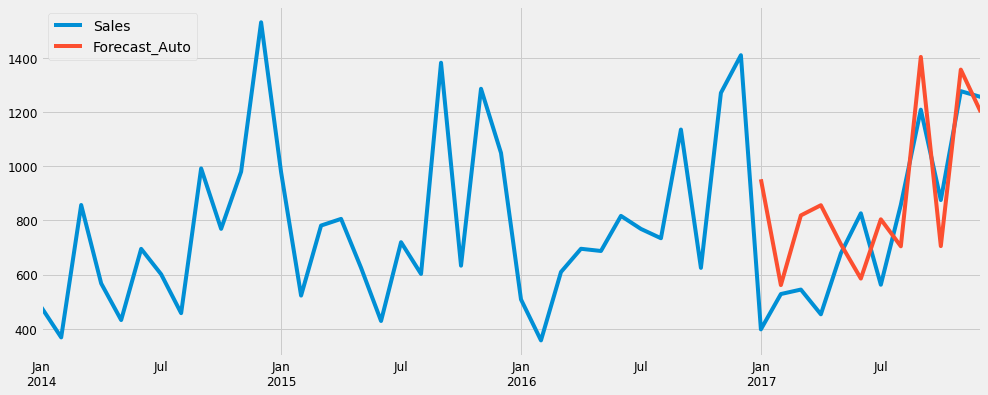

In [79]:
#plotting the actual versus forecasted

Actual_Forecast_Df.plot(figsize=(15, 6));plt.show()

In [80]:
#checking the error

Validation_Df=Actual_Forecast_Df[-12:].copy()
#MAPE
np.mean(abs(Validation_Df['Sales']-Validation_Df['Forecast_Auto'])/Validation_Df['Sales'])*100 

35.51773798552297

In [81]:
arimaModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   36
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                -161.587
Date:                  Sun, 18 Sep 2022   AIC                            329.174
Time:                          15:53:21   BIC                            332.708
Sample:                      01-01-2014   HQIC                           330.111
                           - 12-01-2016                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     74.0420     48.625      1.523      0.128     -21.260     169.344
ar.S.L12      -0.7870      0.131     -6.027      0.000      -1.043      -0.531
sigma2      2.557e+04   1.31e+04      1.946      0.052    -186.552    5.13e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.00
Prob(Q):                              0.92   Prob(JB):                         0.61
Heteroskedasticity (H):               0.77   Skew:                            -0.32
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
log_train=np.log(train)

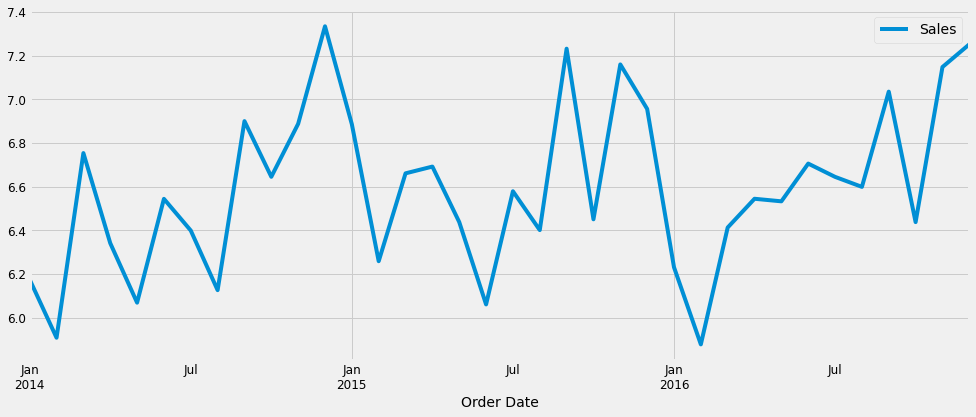

In [83]:
log_train.plot(figsize=(15, 6));plt.show()

In [55]:
arimaModel_log=auto_arima(log_train,m=12,stationary=True)

In [56]:
Forecast_Nu=pd.Series(arimaModel_log.predict(12)).rename('Forecast_nu');Forecast_Nu

2017-01-01    6.800502
2017-02-01    6.318859
2017-03-01    6.505083
2017-04-01    6.728285
2017-05-01    6.655361
2017-06-01    6.314829
2017-07-01    6.677214
2017-08-01    6.639392
2017-09-01    7.090025
2017-10-01    6.416758
2017-11-01    7.094047
2017-12-01    6.837949
Freq: MS, Name: Forecast_nu, dtype: float64

In [57]:
Actual_Forecast_Df=pd.concat([furniture,np.exp(Forecast_Nu)],axis=1)

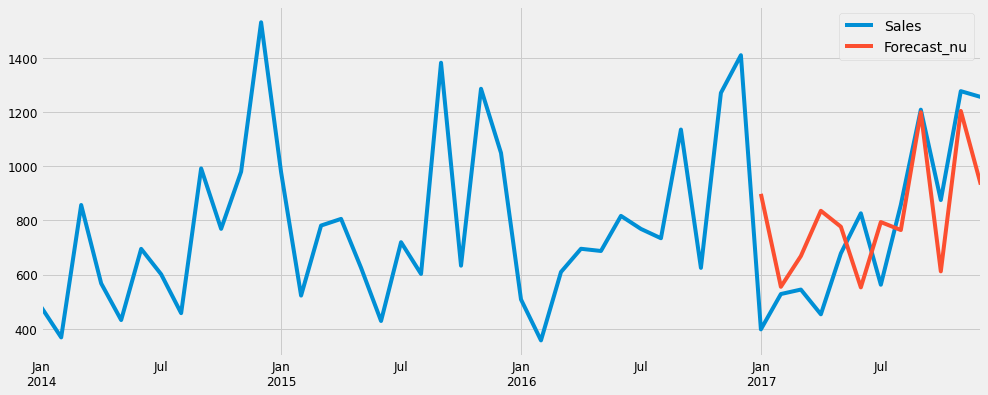

In [58]:
#plotting the actual versus forecasted

Actual_Forecast_Df.plot(figsize=(15, 6));plt.show()

In [59]:
Validation_Df

,Sales,Forecast_Auto
2017-01-01,397.602133,952.239137
2017-02-01,528.179800,561.183742
2017-03-01,544.672240,818.718260
2017-04-01,453.297905,856.341429
2017-05-01,678.302328,712.300615
2017-06-01,826.460291,585.317041
2017-07-01,562.524857,804.190717
2017-08-01,857.881889,704.545096
2017-09-01,1209.508583,1404.261421
2017-10-01,875.362728,705.295410


In [60]:
#checking the error

Validation_Df=Actual_Forecast_Df[-12:].copy()
#MAPE
np.mean(abs(Validation_Df['Sales']-Validation_Df['Forecast_nu'])/Validation_Df['Sales'])*100 

33.34675347958834

In [61]:
Validation_Df

,Sales,Forecast_nu
2017-01-01,397.602133,898.298339
2017-02-01,528.179800,554.939604
2017-03-01,544.672240,668.531146
2017-04-01,453.297905,835.712456
2017-05-01,678.302328,776.938144
2017-06-01,826.460291,552.707274
2017-07-01,562.524857,794.103363
2017-08-01,857.881889,764.629847
2017-09-01,1209.508583,1199.937834
2017-10-01,875.362728,612.015850


In [62]:
#Grid serach for ARIMA

p,d,q,P,D,Q=range(3),range(1),range(3),range(3),range(1),range(3)
pList,dList,qList,PList,DList,QList=[],[],[],[],[],[]

In [63]:
#for storing the MAPE values of the different model
mapeList=[]

In [64]:
for i in p:
    for j in d:
        for k in q:
            for l in P:
                for m in D:
                    for n in Q:
                        
                        print(i,j,k,l,m,n)
                        
                        temparima_model=ARIMA((i,j,k),(l,m,n,12)).fit(train)
                        
                        Forecast=pd.Series(temparima_model.predict(12)).rename('Forecast')
                        Forecast.index=test.index
                        Actual_Forecast_Df=pd.concat([furniture,Forecast],axis=1)
                        Validation_df=Actual_Forecast_Df[-12:].copy()
                        tempMAPE=np.mean(abs(Validation_df['Sales']-Validation_df['Forecast'])/Validation_df['Sales'])*100
                        
                        pList.append(i)
                        dList.append(j)
                        qList.append(k)
                        PList.append(l)
                        DList.append(m)
                        QList.append(n)
                        mapeList.append(tempMAPE)
    

0 0 0 0 0 0
0 0 0 0 0 1
0 0 0 0 0 2
0 0 0 1 0 0
0 0 0 1 0 1
0 0 0 1 0 2
0 0 0 2 0 0
0 0 0 2 0 1
0 0 0 2 0 2
0 0 1 0 0 0
0 0 1 0 0 1
0 0 1 0 0 2
0 0 1 1 0 0
0 0 1 1 0 1
0 0 1 1 0 2
0 0 1 2 0 0
0 0 1 2 0 1
0 0 1 2 0 2
0 0 2 0 0 0
0 0 2 0 0 1
0 0 2 0 0 2
0 0 2 1 0 0
0 0 2 1 0 1
0 0 2 1 0 2
0 0 2 2 0 0
0 0 2 2 0 1
0 0 2 2 0 2
1 0 0 0 0 0
1 0 0 0 0 1
1 0 0 0 0 2
1 0 0 1 0 0
1 0 0 1 0 1
1 0 0 1 0 2
1 0 0 2 0 0
1 0 0 2 0 1
1 0 0 2 0 2
1 0 1 0 0 0
1 0 1 0 0 1
1 0 1 0 0 2
1 0 1 1 0 0
1 0 1 1 0 1
1 0 1 1 0 2
1 0 1 2 0 0
1 0 1 2 0 1
1 0 1 2 0 2
1 0 2 0 0 0
1 0 2 0 0 1
1 0 2 0 0 2
1 0 2 1 0 0
1 0 2 1 0 1
1 0 2 1 0 2
1 0 2 2 0 0
1 0 2 2 0 1
1 0 2 2 0 2
2 0 0 0 0 0
2 0 0 0 0 1
2 0 0 0 0 2
2 0 0 1 0 0
2 0 0 1 0 1
2 0 0 1 0 2
2 0 0 2 0 0
2 0 0 2 0 1
2 0 0 2 0 2
2 0 1 0 0 0
2 0 1 0 0 1
2 0 1 0 0 2
2 0 1 1 0 0
2 0 1 1 0 1
2 0 1 1 0 2
2 0 1 2 0 0
2 0 1 2 0 1
2 0 1 2 0 2
2 0 2 0 0 0
2 0 2 0 0 1
2 0 2 0 0 2
2 0 2 1 0 0
2 0 2 1 0 1
2 0 2 1 0 2
2 0 2 2 0 0
2 0 2 2 0 1
2 0 2 2 0 2


In [65]:
arima_Eval_df=pd.DataFrame({"p":pList,"d":dList,"q":qList,
                            "P":PList,"D":DList,"Q":QList,"MAPE":mapeList})

In [66]:

arima_Eval_df

,p,d,q,P,D,Q,MAPE
0,0,0,0,0,0,0,37.681092
1,0,0,0,0,0,1,25.882709
2,0,0,0,0,0,2,34.513382
3,0,0,0,1,0,0,21.479293
4,0,0,0,1,0,1,23.903246
...,...,...,...,...,...,...,...
76,2,0,2,1,0,1,21.823190
77,2,0,2,1,0,2,34.233524
78,2,0,2,2,0,0,27.533952
79,2,0,2,2,0,1,30.226315


In [67]:
arima_Eval_df['MAPE'].min()

19.63786390950274

In [68]:
arima_Eval_df[arima_Eval_df['MAPE']==19.63786390950274]

,p,d,q,P,D,Q,MAPE
39,1,0,1,1,0,0,19.637864


In [69]:
Final_arima_Model2=ARIMA((1,0,1),(1,0,0,12)).fit(furniture)

In [70]:
Forecast_Final=pd.Series(arimaModel.predict(24)).rename('Forecast_Final');Forecast_Final

2017-01-01     654.057015
2017-02-01     476.493859
2017-03-01     701.390898
2017-04-01     722.708308
2017-05-01     730.446498
2017-06-01     820.095321
2017-07-01     772.909553
2017-08-01     770.703237
2017-09-01    1014.747626
2017-10-01     695.081834
2017-11-01    1109.215394
2017-12-01    1206.746306
2018-01-01     707.731691
2018-02-01     588.294889
2018-03-01     740.837657
2018-04-01     749.810081
2018-05-01     759.474202
2018-06-01     815.039554
2018-07-01     786.062281
2018-08-01     783.820006
2018-09-01     944.232888
2018-10-01     734.701569
2018-11-01    1006.118969
2018-12-01    1071.510086
Freq: MS, Name: Forecast_Final, dtype: float64

In [71]:
#Providing the index/dates for the forecasts to be done 2017 onwards
start="2017-1-1"
end="2018-12-1"

predixn_months=pd.date_range(start,end,freq='MS')

Forecast_Final.index=predixn_months

In [72]:
df_with_forecast=pd.concat([furniture,Forecast_Final],axis=1)

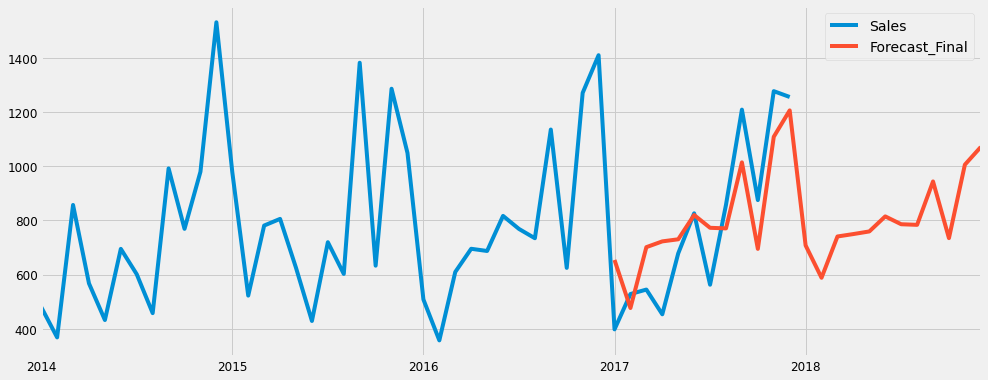

In [73]:

df_with_forecast.plot(figsize=(15, 6));plt.show()